<a href="https://colab.research.google.com/github/GENTLEW1ND/Python/blob/main/Students_score_by_year_and_gender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
# configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
# Kaggle api
!kaggle datasets download fundal/sat-by-year-and-gender-1967-2001

Dataset URL: https://www.kaggle.com/datasets/fundal/sat-by-year-and-gender-1967-2001
License(s): CC0-1.0
  0% 0.00/799 [00:00<?, ?B/s]
100% 799/799 [00:00<00:00, 153kB/s]


In [4]:
!ls

sample_data  sat-by-year-and-gender-1967-2001.zip


In [5]:
# Extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/sat-by-year-and-gender-1967-2001.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [6]:
!ls

sample_data  sat-by-year-and-gender-1967-2001.zip  SAT_by_Year_Gender_1967_2001.csv


**Importing the dependencies **

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [8]:
# Loading the csv file to a pandas dataframe
student_data = pd.read_csv("/content/SAT_by_Year_Gender_1967_2001.csv")

In [9]:
student_data.head()

,Year,M_verbal,F_verbal,M_math,F_math,A_verbal,A_math,M_averages,F_averages,A_averages
0,1967,540,545,535,495,543,516,538,520,529
1,1968,541,543,533,497,543,516,537,520,528
2,1969,536,543,534,498,540,517,535,520,528
3,1970,536,538,531,493,537,512,534,516,524
4,1971,531,534,529,494,532,513,530,514,522


In [10]:
# Printing the size of the dataframe
student_data.shape

(35, 10)

In [11]:
# Getting some information about the dataframe
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Year        35 non-null     int64
 1   M_verbal    35 non-null     int64
 2   F_verbal    35 non-null     int64
 3   M_math      35 non-null     int64
 4   F_math      35 non-null     int64
 5   A_verbal    35 non-null     int64
 6   A_math      35 non-null     int64
 7   M_averages  35 non-null     int64
 8   F_averages  35 non-null     int64
 9   A_averages  35 non-null     int64
dtypes: int64(10)
memory usage: 2.9 KB


In [12]:
# Getting the statistical measures of the data
student_data.describe()

,Year,M_verbal,F_verbal,M_math,F_math,A_verbal,A_math,M_averages,F_averages,A_averages
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,1984.000000,514.057143,508.371429,524.028571,485.057143,511.171429,503.685714,518.971429,496.742857,507.771429
std,10.246951,11.206466,15.262576,6.021949,8.653265,13.307419,7.722280,7.789456,10.592291,9.068646
min,1967.000000,501.000000,495.000000,515.000000,473.000000,499.000000,492.000000,510.000000,484.000000,498.000000
25%,1975.500000,507.000000,498.000000,520.000000,478.500000,504.000000,497.500000,513.500000,490.000000,501.000000
50%,1984.000000,509.000000,502.000000,523.000000,484.000000,505.000000,502.000000,516.000000,492.000000,505.000000
75%,1992.500000,515.000000,508.500000,529.500000,493.500000,510.500000,511.000000,520.500000,500.500000,510.000000
max,2001.000000,541.000000,545.000000,535.000000,498.000000,543.000000,517.000000,538.000000,520.000000,529.000000


In [13]:
# Getting some information using a correlation matrix
correlation = student_data[['M_verbal', 'F_verbal','M_math','F_math', 'A_verbal', 'A_math', 'M_averages', 'F_averages']].corr() #Double brackets are used when we want to select multiple columns
print(correlation)

            M_verbal  F_verbal    M_math    F_math  A_verbal    A_math  \
M_verbal    1.000000  0.972816  0.538659  0.444300  0.989994  0.559292   
F_verbal    0.972816  1.000000  0.623890  0.540542  0.994958  0.648088   
M_math      0.538659  0.623890  1.000000  0.957792  0.591574  0.984951   
F_math      0.444300  0.540542  0.957792  1.000000  0.503081  0.983120   
A_verbal    0.989994  0.994958  0.591574  0.503081  1.000000  0.614170   
A_math      0.559292  0.648088  0.984951  0.983120  0.614170  1.000000   
M_averages  0.941077  0.956263  0.790055  0.702547  0.955400  0.797820   
F_averages  0.883455  0.941366  0.836552  0.791471  0.922804  0.863393   

            M_averages  F_averages  
M_verbal      0.941077    0.883455  
F_verbal      0.956263    0.941366  
M_math        0.790055    0.836552  
F_math        0.702547    0.791471  
A_verbal      0.955400    0.922804  
A_math        0.797820    0.863393  
M_averages    1.000000    0.975213  
F_averages    0.975213    1.000000  


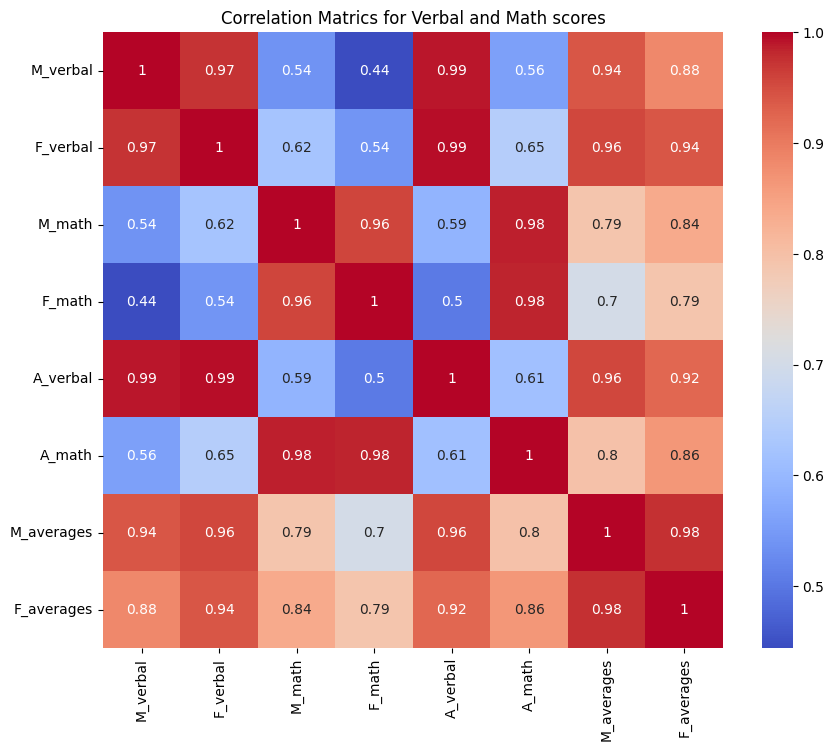

In [14]:
# Correlation with visual represntation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation,annot=True, cmap='coolwarm')
plt.title("Correlation Matrics for Verbal and Math scores")
plt.show()

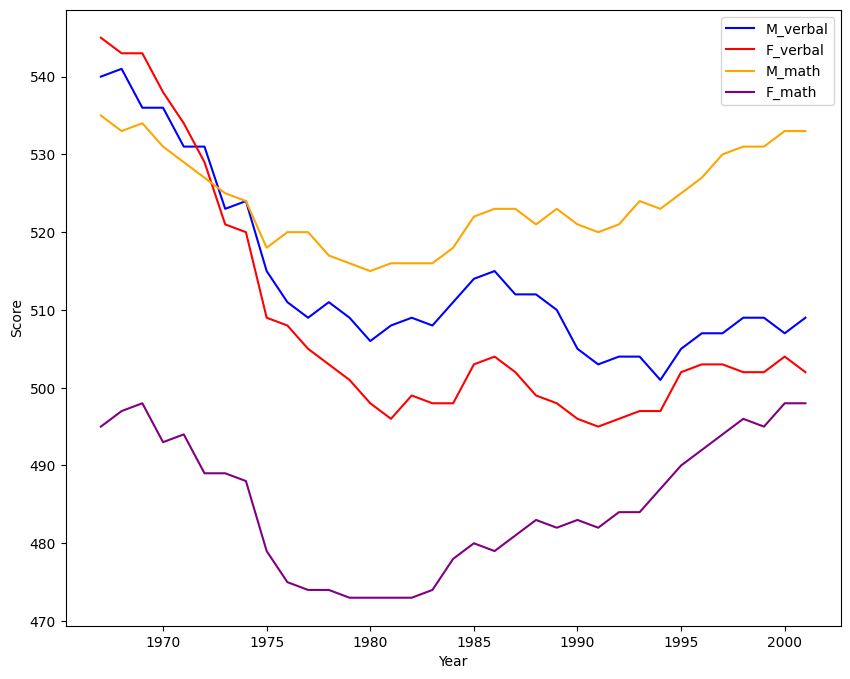

In [15]:
# Ploting a graph
plt.figure(figsize=(10,8))
plt.plot(student_data['Year'],student_data['M_verbal'],label='M_verbal', color='blue')
plt.plot(student_data['Year'],student_data['F_verbal'],label='F_verbal', color='red')
plt.plot(student_data['Year'],student_data['M_math'],label='M_math', color='orange')
plt.plot(student_data['Year'],student_data['F_math'],label='F_math', color='purple')
plt.ylabel('Score')
plt.xlabel('Year')
plt.legend()
plt.show()

In [16]:
# Splitting the features and target
X = student_data[['Year']]
Y = student_data['A_averages']

In [17]:
X.head()

,Year
0,1967
1,1968
2,1969
3,1970
4,1971


In [18]:
Y.head()

,A_averages
0,529
1,528
2,528
3,524
4,522


In [19]:
# Splitting the data into training data and testing data.
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [20]:
print(X.shape,X_train.shape,X_test.shape)

(35, 1) (28, 1) (7, 1)


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [22]:
model = LinearRegression()

In [23]:
model.fit(X_train,Y_train)

LinearRegression()

In [24]:
# Training data prediction
training_data_prediction = model.predict(X_train)

# Calculating evaluation metrics with unique variable names
mse_value = mean_squared_error(Y_train, training_data_prediction)
mae_value = mean_absolute_error(Y_train, training_data_prediction)
rmse_value = np.sqrt(mse_value)  # Use mse_value here
r2_value = r2_score(Y_train, training_data_prediction)

# Using f-strings to print the results
print(f"Mean Absolute Error: {mae_value}")
print(f"Mean Squared Error: {mse_value}")
print(f"Root Mean Squared Error: {rmse_value}")
print(f"R-squared (R²): {r2_value}")


Mean Absolute Error: 6.343904613039468
Mean Squared Error: 53.17057191945769
Root Mean Squared Error: 7.291815406293394
R-squared (R²): 0.2910108105167897


In [25]:
# Testing data prediction
testing_data_prediction = model.predict(X_test)

mse_value = mean_squared_error(Y_test, testing_data_prediction)
mae_value = mean_absolute_error(Y_test, testing_data_prediction)
rmse_value = np.sqrt(mse_value)  # Use mse_value here
r2_value = r2_score(Y_test, testing_data_prediction)

# Using f-strings to print the results
print(f"Mean Absolute Error: {mae_value}")
print(f"Mean Squared Error: {mse_value}")
print(f"Root Mean Squared Error: {rmse_value}")
print(f"R-squared (R²): {r2_value}")


Mean Absolute Error: 8.153307853996385
Mean Squared Error: 82.73811388177292
Root Mean Squared Error: 9.096049355724325
R-squared (R²): 0.15291107810136395


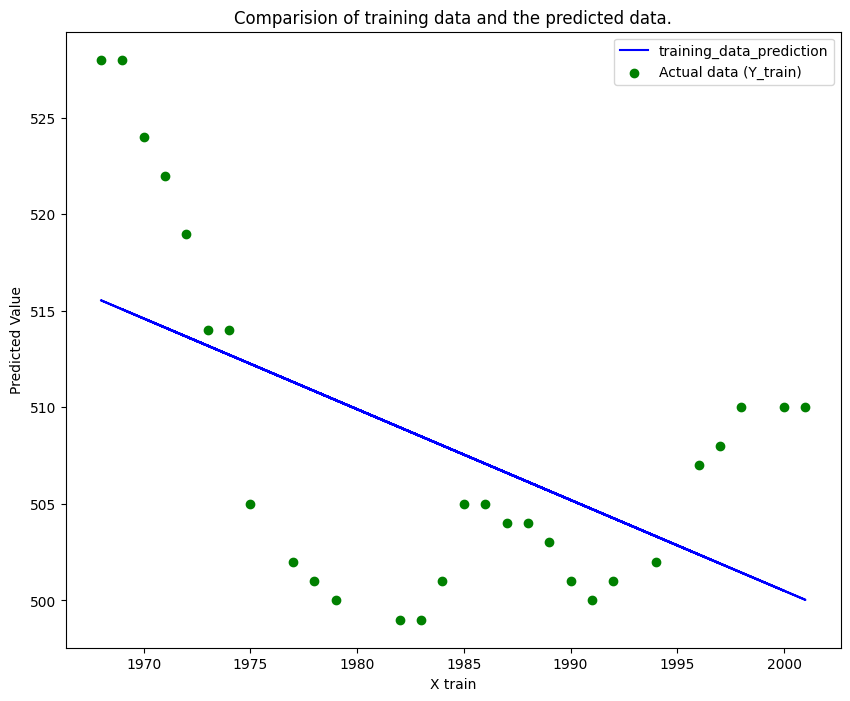

In [26]:
plt.figure(figsize=(10,8))
plt.plot(X_train,training_data_prediction, label='training_data_prediction',color='Blue')
plt.scatter(X_train,Y_train,label='Actual data (Y_train)', color='Green')
plt.xlabel('X train')
plt.ylabel('Predicted Value')
plt.title("Comparision of training data and the predicted data.")
plt.legend()
plt.show()

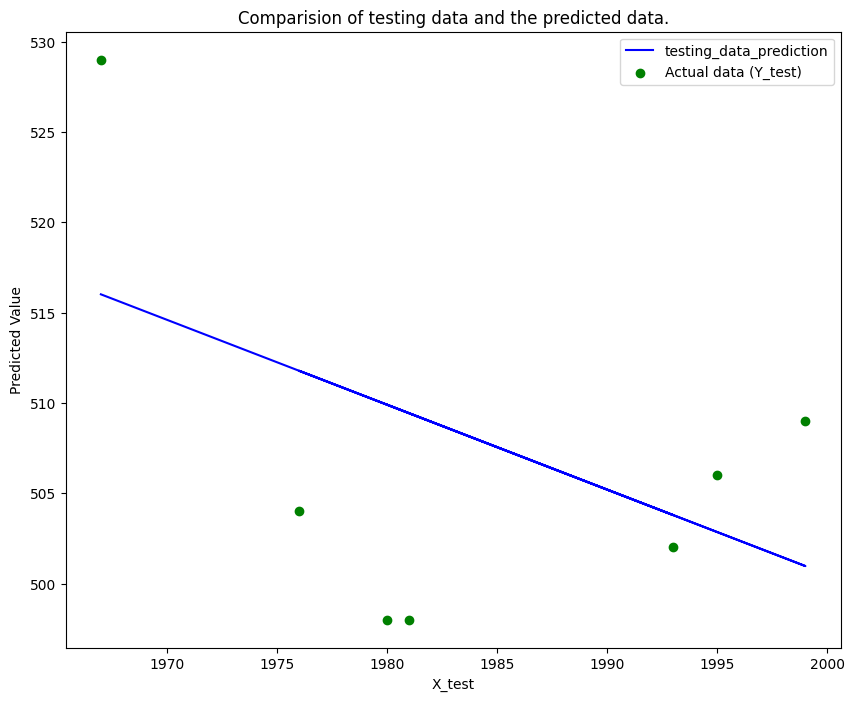

In [27]:
plt.figure(figsize=(10,8))
plt.plot(X_test,testing_data_prediction, label='testing_data_prediction',color='Blue')
plt.scatter(X_test,Y_test,label='Actual data (Y_test)', color='Green')
plt.xlabel('X_test')
plt.ylabel('Predicted Value')
plt.title("Comparision of testing data and the predicted data.")
plt.legend()
plt.show()

In [29]:
# Prediction for years in the future
future_prediction = pd.DataFrame({"Year":range(2003,2024)})
future_years_prediction = model.predict(future_prediction)

future_prediction['Average for the future years'] = future_years_prediction
print(future_prediction)

    Year  Average for the future years
0   2003                    499.088398
1   2004                    498.618258
2   2005                    498.148118
3   2006                    497.677979
4   2007                    497.207839
5   2008                    496.737699
6   2009                    496.267559
7   2010                    495.797419
8   2011                    495.327279
9   2012                    494.857139
10  2013                    494.386999
11  2014                    493.916859
12  2015                    493.446719
13  2016                    492.976580
14  2017                    492.506440
15  2018                    492.036300
16  2019                    491.566160
17  2020                    491.096020
18  2021                    490.625880
19  2022                    490.155740
20  2023                    489.685600
